In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Good_Food_Purchasing_Data_df = pd.read_csv("Dataset/Good_Food_Purchasing_Data.csv")

In [3]:
Good_Food_Purchasing_Data_df.head()

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units,Total Weight in lbs,Total Cost
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,100.0,560.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,106.0,600.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0,1200.0,16200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0,600.0,1940.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0,60.0,290.0


## Analysis the Dataset

In [4]:
df = Good_Food_Purchasing_Data_df.copy()

In [5]:
df.shape

(17208, 12)

In [6]:
df.isna().sum()

Agency                       0
Time Period                  0
Food Product Group           0
Food Product Category        0
Product Name                 1
Product Type                 0
Origin Detail             2149
Distributor                911
Vendor                     486
# of Units                  56
Total Weight in lbs         58
Total Cost               13441
dtype: int64

In [7]:
df.dropna(axis= 0, inplace= True)
df.shape

(2808, 12)

In [8]:
df.head()

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units,Total Weight in lbs,Total Cost
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,100.0,560.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,106.0,600.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0,1200.0,16200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0,600.0,1940.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0,60.0,290.0


In [9]:
df.to_csv("Dataset/Good_Food_Purchasing_Data_Cleaned.csv", index= False)

## EDA

### Food Product Category

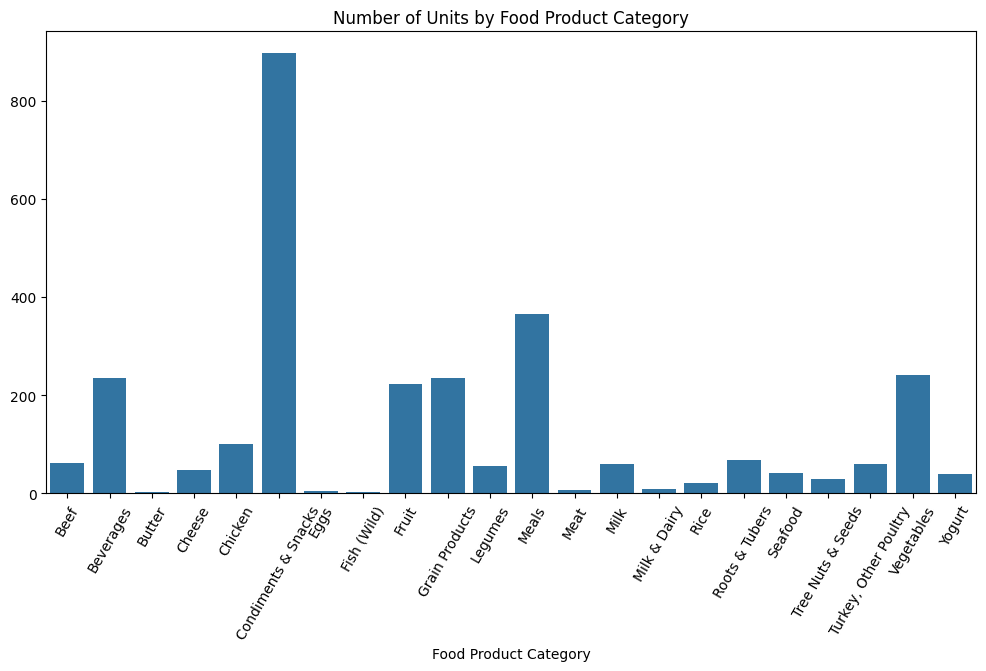

In [101]:
df_grouped_food_product_category = df.groupby("Food Product Category")

plt.figure(figsize=(12, 6))
sns.barplot(x=df_grouped_food_product_category.count().index, y=df_grouped_food_product_category.count()['# of Units'].values)
plt.title('Number of Units by Food Product Category')
plt.xticks(rotation= 60)
plt.show()

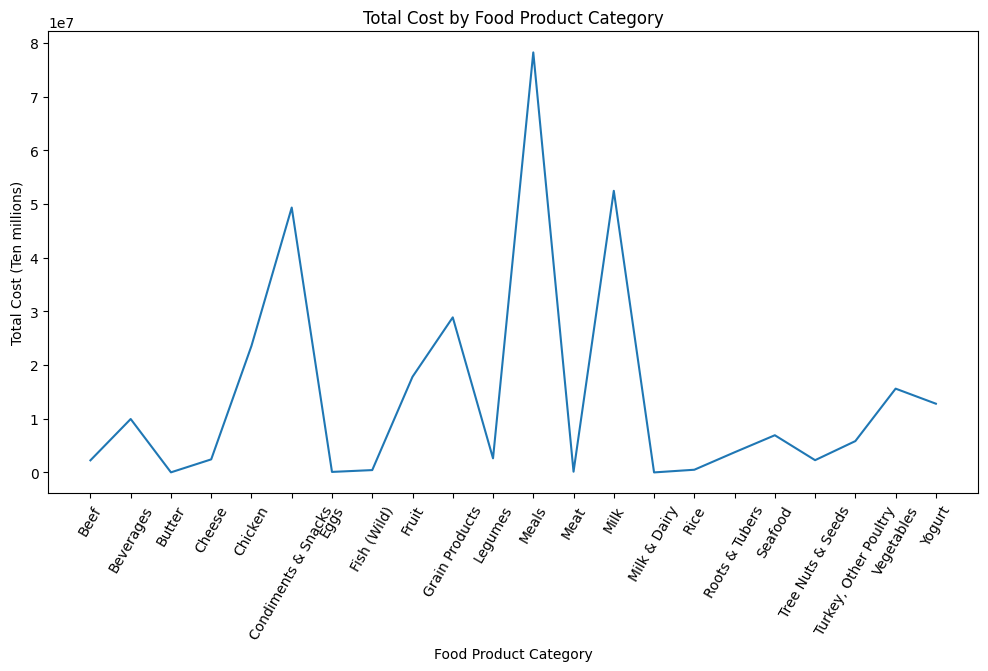

In [102]:
plt.figure(figsize=(12, 6))
# sns.barplot(x=df_grouped_food_product_category.count().index, y=df_grouped_food_product_category['Total Cost'].sum())
sns.lineplot(df_grouped_food_product_category['Total Cost'].sum())
plt.xticks(rotation= 60)
plt.ylabel("Total Cost (Ten millions)")
plt.xlabel("Food Product Category")
plt.title('Total Cost by Food Product Category')
plt.show()

### Time Period

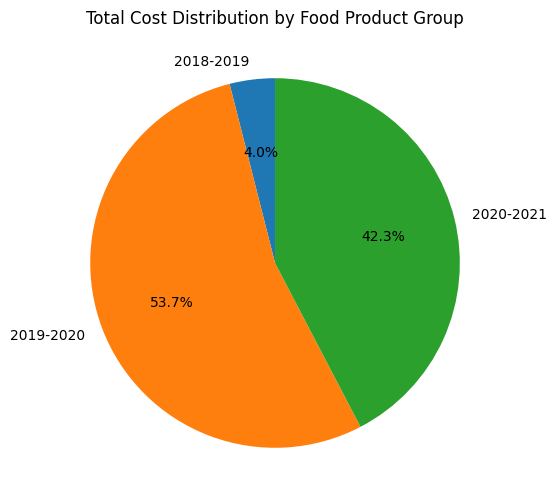

In [10]:
time_period_group = df.groupby('Time Period')

plt.figure(figsize=(6, 6))
plt.pie(time_period_group['Total Cost'].sum(), labels=time_period_group.count().index, autopct='%1.1f%%', startangle=90)
plt.title('Total Cost Distribution by Food Product Group')
plt.show()

d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\se

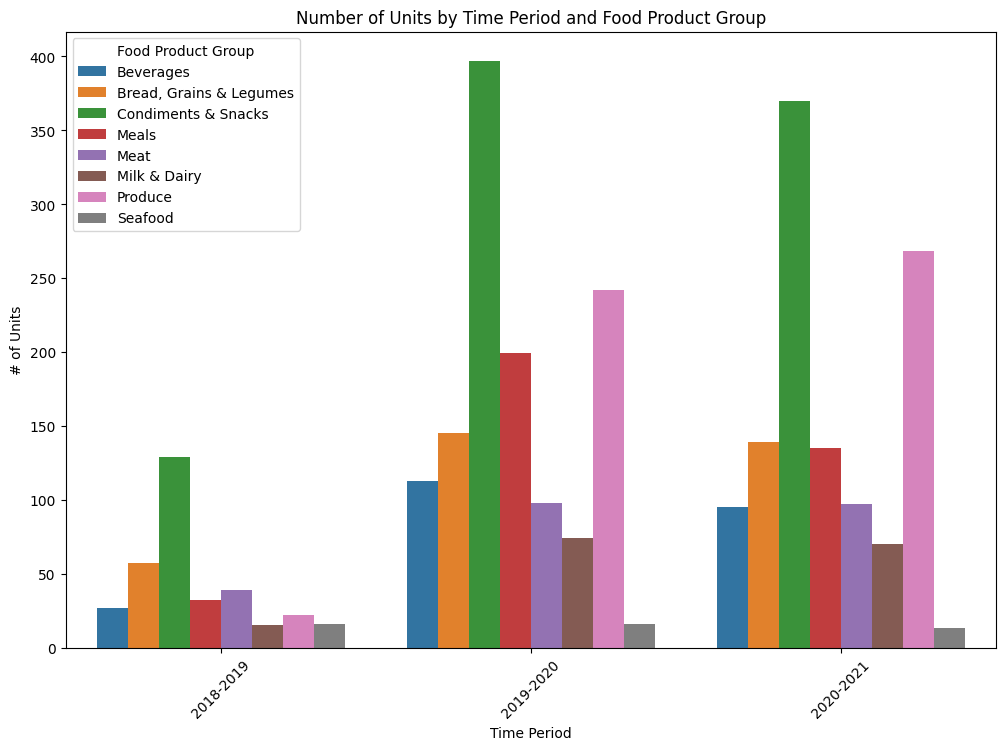

In [11]:
# time_period_food_product_group = df.groupby(['Time Period', 'Food Product Group'])
time_period_food_product_group = df.groupby(['Time Period', 'Food Product Group']).count()

plt.figure(figsize=(12, 8))
sns.barplot(x='Time Period', y='# of Units', hue='Food Product Group', data=time_period_food_product_group)
plt.title('Number of Units by Time Period and Food Product Group')
plt.xticks(rotation=45)
plt.show()

d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\College\WIL\WIL_Week-1\.venv\Lib\site-packages\se

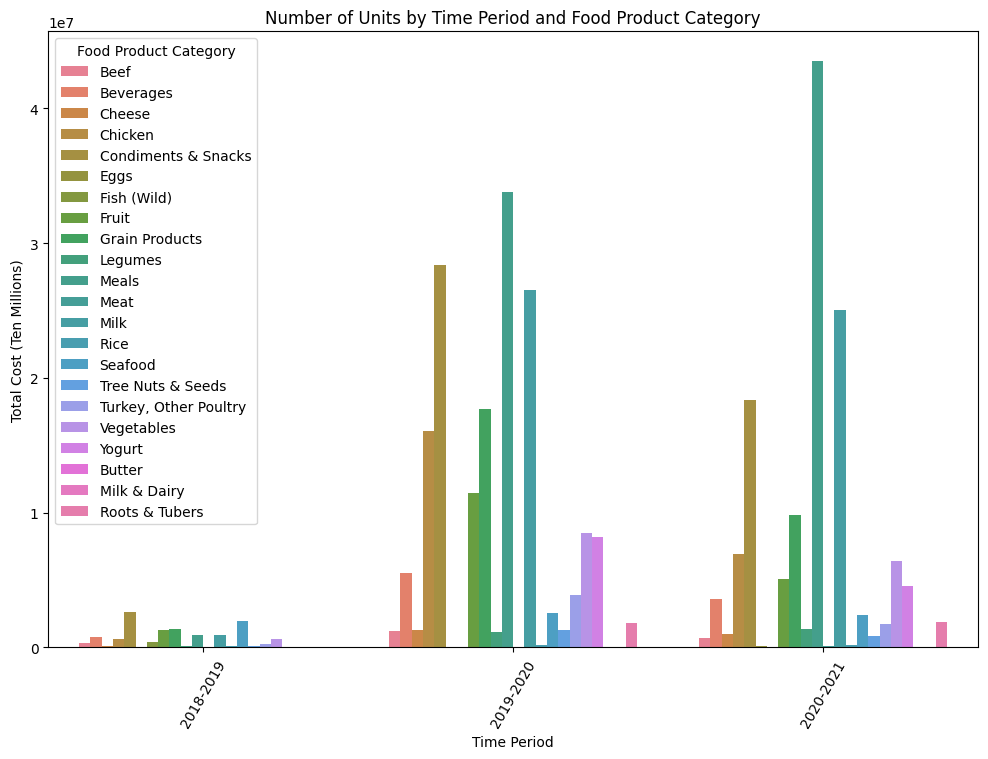

In [12]:
time_period_food_product_group = df.groupby(['Time Period', 'Food Product Category']).sum()

plt.figure(figsize=(12, 8))
sns.barplot(x='Time Period', y='Total Cost', hue='Food Product Category', data=time_period_food_product_group)
plt.title('Number of Units by Time Period and Food Product Category')
plt.xticks(rotation=60)
plt.ylabel("Total Cost (Ten Millions)")
plt.show()

### ---